<a href="https://colab.research.google.com/github/ikanx101/G-Colab/blob/main/Korelasi_NET_SO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisa Korelasi Tahap II

Sekarang kita lanjutkan tahap berikutnya ya. Ada dua tujuan utama:

1. Mencari tahu, mana saja yang di-_exclude_ dari perhitungan korelasi.
1. Menghitung korelasi dengan cara transformasi data menggunakan fungsi logaritmik.

---

# Data yang Digunakan

Sebelum melakukan analisa lebih jauh, kita _import_ datanya terlebih dahulu sebagai berikut:

In [30]:
# sucikan diri
rm(list=ls())

# install library yang dibutuhkan
#install.packages("janitor")
#install.packages("reshape2")

# panggil libraries
library(readxl)
library(dplyr)
library(ggplot2)
library(reshape2)

# import data
data = read_excel("Data Correlation Coefficient 2021.xlsx",
                  skip = 3) %>%
       janitor::clean_names()

# kita cek struktur datanya
data %>% str()

# lihat sampel 10 data teratas
data %>% head()

tibble [243 × 5] (S3: tbl_df/tbl/data.frame)
 $ row_labels                                                   : chr [1:243] "ALAM JAYA WIRASENTOSA - BALIGE, PT" "ALAM JAYA WIRASENTOSA - KISARAN, PT" "ALAM JAYA WIRASENTOSA - KT PINANG, PT" "ALAM JAYA WIRASENTOSA - MEDAN, PT" ...
 $ btl                                                          : num [1:243] 4996983 21642680 3361057 119247 4979608 ...
 $ correlation_coefficient_btl_along_customer_si_site_group_desc: num [1:243] 0.803 0.803 0.803 0.803 0.803 ...
 $ net_so                                                       : num [1:243] 1.73e+08 3.64e+08 9.28e+07 0.00 1.17e+08 ...
 $ grand_total                                                  : num [1:243] 1.78e+08 3.85e+08 9.62e+07 1.19e+05 1.22e+08 ...


row_labels,btl,correlation_coefficient_btl_along_customer_si_site_group_desc,net_so,grand_total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
"ALAM JAYA WIRASENTOSA - BALIGE, PT",4996983,0.8027937,172578228,177575212.2
"ALAM JAYA WIRASENTOSA - KISARAN, PT",21642680,0.8027937,363764161,385406841.5
"ALAM JAYA WIRASENTOSA - KT PINANG, PT",3361057,0.8027937,92818013,96179070.8
"ALAM JAYA WIRASENTOSA - MEDAN, PT",119247,0.8027937,0,119247.8
"ALAM JAYA WIRASENTOSA - NIAS, PT",4979608,0.8027937,116994974,121974582.8
"ALAM JAYA WIRASENTOSA - PANYAMBUNGAN, PT",1636389,0.8027937,149696380,151332769.8


# Pengerjaan
## Tujuan I

Sekarang kita akan coba cari tahu, titik data mana yang harusnya di-_exclude_. Caranya dengan melakukan visualisasi data.

Namun sebelum itu, sudah ada proses _filtering_ dimana baris data yang _blank_ pada variabel `btl` dan atau `net_so` harus dibuang terlebih dahulu.

In [31]:
# proses filtering data dari baris blank
data_clean = 
  data %>%
  filter(!is.na(btl)) %>%
  filter(!is.na(net_so))

# cek kembali struktur data
data_clean %>% str()

tibble [243 × 5] (S3: tbl_df/tbl/data.frame)
 $ row_labels                                                   : chr [1:243] "ALAM JAYA WIRASENTOSA - BALIGE, PT" "ALAM JAYA WIRASENTOSA - KISARAN, PT" "ALAM JAYA WIRASENTOSA - KT PINANG, PT" "ALAM JAYA WIRASENTOSA - MEDAN, PT" ...
 $ btl                                                          : num [1:243] 4996983 21642680 3361057 119247 4979608 ...
 $ correlation_coefficient_btl_along_customer_si_site_group_desc: num [1:243] 0.803 0.803 0.803 0.803 0.803 ...
 $ net_so                                                       : num [1:243] 1.73e+08 3.64e+08 9.28e+07 0.00 1.17e+08 ...
 $ grand_total                                                  : num [1:243] 1.78e+08 3.85e+08 9.62e+07 1.19e+05 1.22e+08 ...


Ternyata semua datanya sudah "bersih" (tidak ada baris data yang _blank_). Oke sekarang kita buat visualisasinya sebagai berikut:

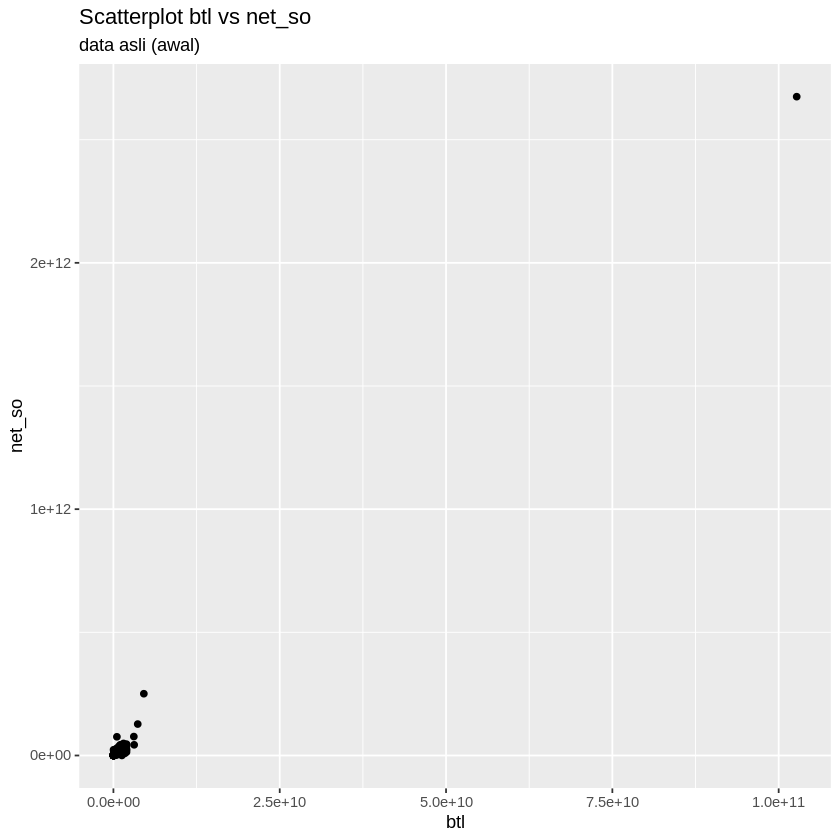

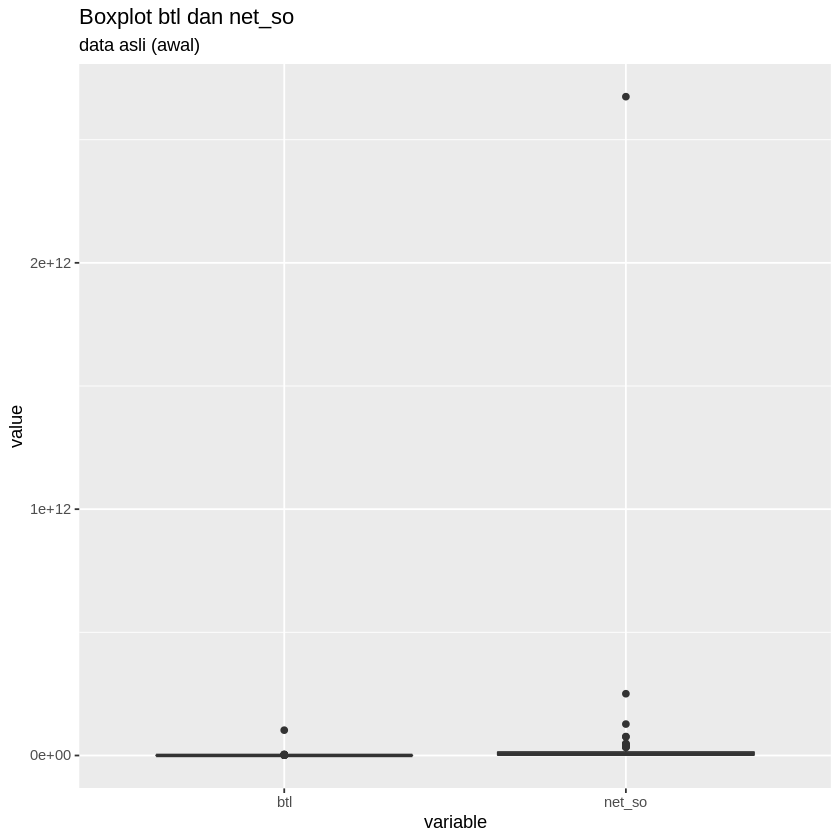

In [32]:
data_clean %>%
  ggplot(aes(x = btl,
             y = net_so)) +
  geom_point() +
  labs(title = "Scatterplot btl vs net_so",
       subtitle = "data asli (awal)")

data_clean %>%
  select(row_labels,btl,net_so) %>%
  melt(id.vars = "row_labels") %>%
  ggplot(aes(x = variable,
             y = value)) +
  geom_boxplot() +
  labs(title = "Boxplot btl dan net_so",
       subtitle = "data asli (awal)")
  

Ternyata terlihat jelas pada _scatterplot_ ada satu pasang titik data yang terletak pada pojok kanan (ekstrim).

Sekarang kita akan hapus 1 baris data tersebut dan membuat plotnya kembali.

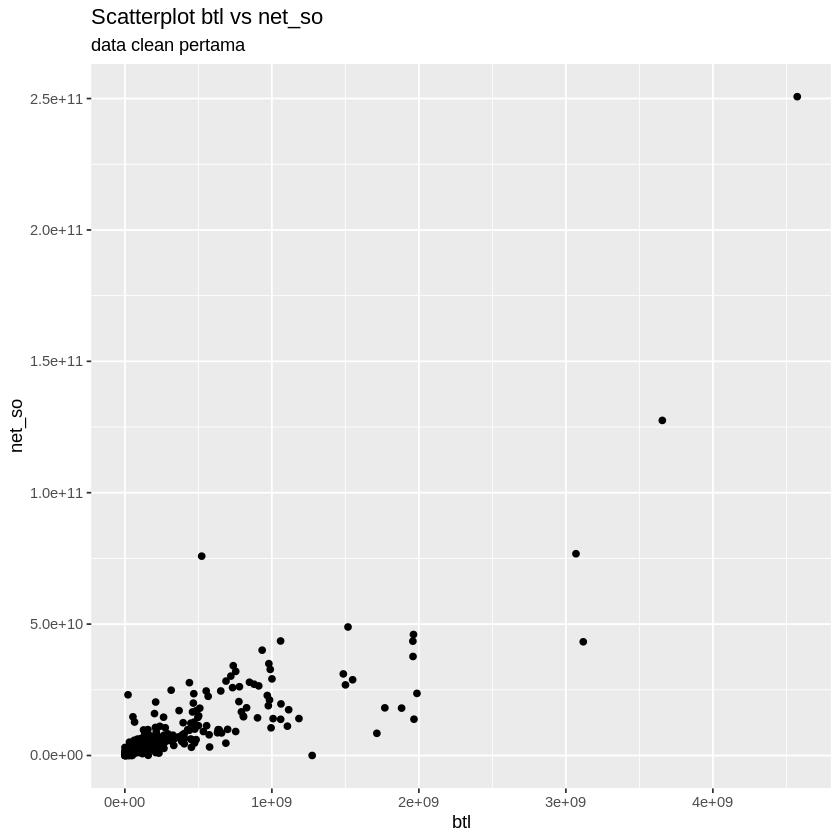

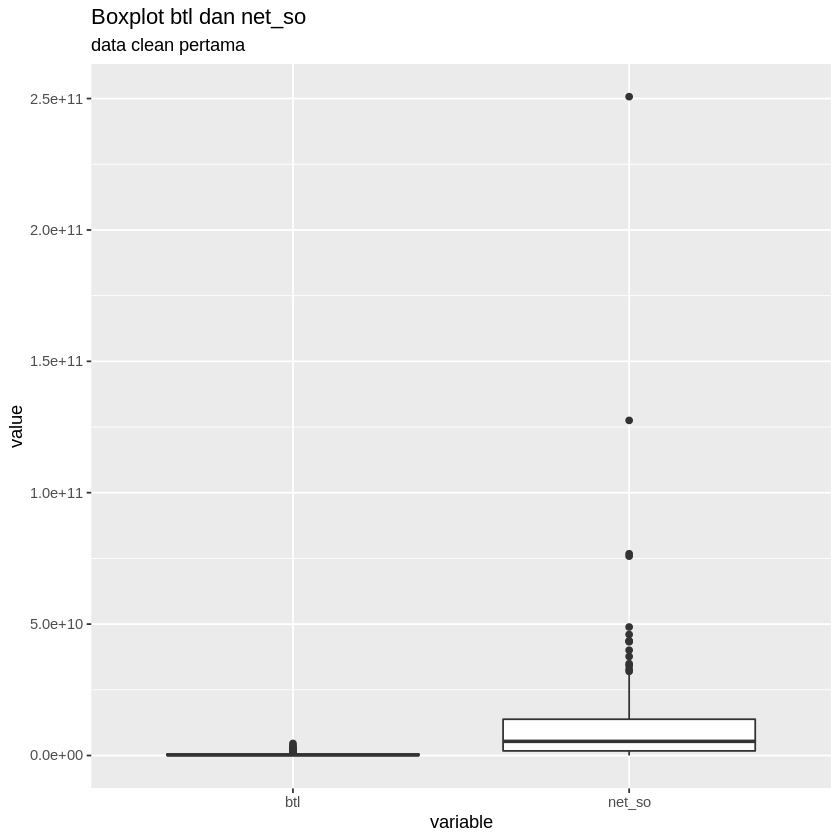

In [33]:
data_clean = 
  data_clean %>%
  filter(btl < 5*10^10)

data_clean %>%
  ggplot(aes(x = btl,
             y = net_so)) +
  geom_point() +
  labs(title = "Scatterplot btl vs net_so",
       subtitle = "data clean pertama")

data_clean %>%
  select(row_labels,btl,net_so) %>%
  melt(id.vars = "row_labels") %>%
  ggplot(aes(x = variable,
             y = value)) +
  geom_boxplot() +
  labs(title = "Boxplot btl dan net_so",
       subtitle = "data clean pertama")
  

Dari _boxplot_ dan _scatterplot_ terlihat ada 4 titik data yang bernilai ekstrim. Kita akan hapus kembali

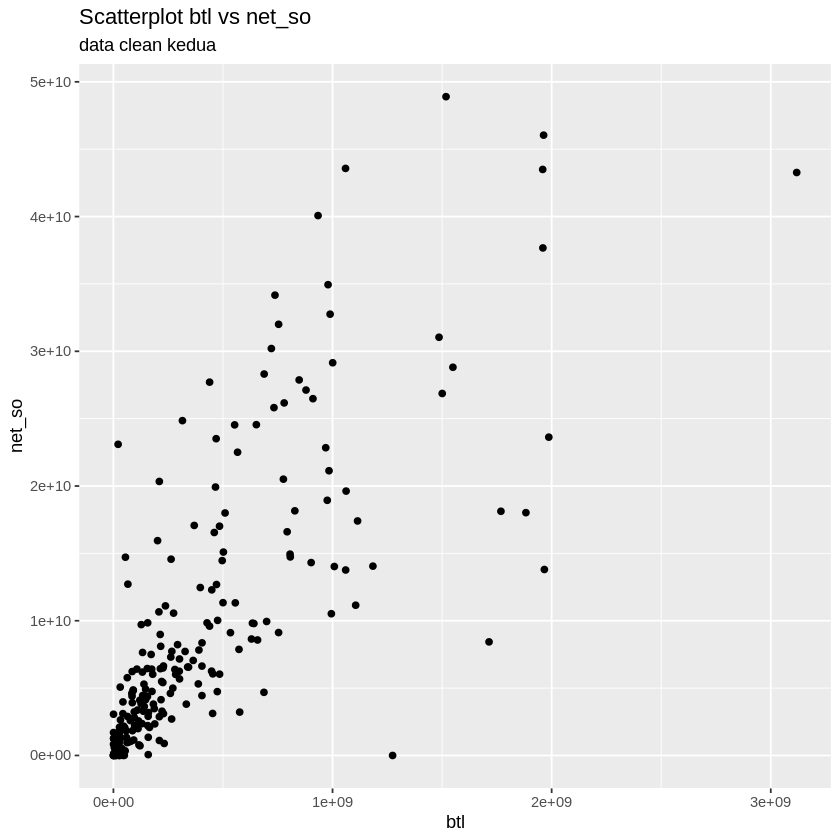

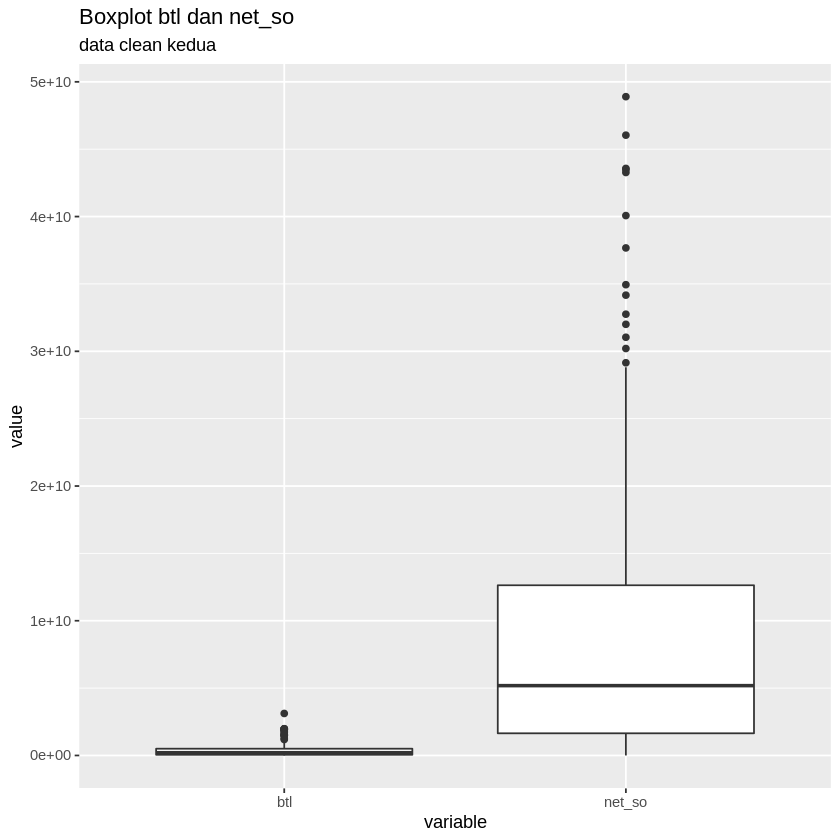

In [34]:
data_clean = 
  data_clean %>%
  filter(net_so < 6*10^10)

data_clean %>%
  ggplot(aes(x = btl,
             y = net_so)) +
  geom_point() +
  labs(title = "Scatterplot btl vs net_so",
       subtitle = "data clean kedua")

data_clean %>%
  select(row_labels,btl,net_so) %>%
  melt(id.vars = "row_labels") %>%
  ggplot(aes(x = variable,
             y = value)) +
  geom_boxplot() +
  labs(title = "Boxplot btl dan net_so",
       subtitle = "data clean kedua")
  

Dari _scatterplot_ terlihat titik data sudah lebih __"rapi"__. Mari kita hitung korelasinya:

In [35]:
# perhitungan korelasi pearson
cor.test(data_clean$btl,
         data_clean$net_so,
         method = "pearson")

# perhitungan korelasi spearman
cor.test(data_clean$btl,
         data_clean$net_so,
         method = "spearman",
         exact=FALSE)


	Pearson's product-moment correlation

data:  data_clean$btl and data_clean$net_so
t = 18.411, df = 236, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7099662 0.8153627
sample estimates:
      cor 
0.7678097 



	Spearman's rank correlation rho

data:  data_clean$btl and data_clean$net_so
S = 351511, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8435529 


## Kesimpulan Tujuan I

1. Kedua analisa korelasi di atas menghasilkan $p-value$ yang kecil (mendekati nol) sehingga kita bisa simpulkan bahwa korelasi antara `btl` dan `net_so` __signifikan__ (tidak bisa diabaikan).
1. Nilai korelasi untuk:
    - $r_{pearson} \sim 0.7678$.
    - $r_{spearman} \sim 0.8435$.
1. Ada 5 baris data yang dihapus, yakni

In [36]:
data %>%
  filter(btl > 5*10^10 | net_so > 6*10^10)

row_labels,btl,correlation_coefficient_btl_along_customer_si_site_group_desc,net_so,grand_total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
BSP SURABAYA,3656222190,0.8027937,1.275124e+11,1.311687e+11
"NUTRIFOOD INDONESIA - JAKARTA, PT",4573980828,0.8027937,2.507212e+11,2.552951e+11
"NUTRIFOOD INDONESIA - SURABAYA, PT",522714607,0.8027937,7.585447e+10,7.637718e+10
"RAMASURYA PERKASA DISTRINDO-TANGERANG,PT",3068771048,0.8027937,7.677469e+10,7.984346e+10
Grand Total,102710393001,194.2760793,2.674684e+12,2.777394e+12


_Hahaha_ ternyata saya malah belum menghapus baris `Grand Total` dari data. Tapi gak apa, sekarang sudah terhapus dengan sendirinya. 

Sekarang kita masuk ke tujuan berikutnya!

---

## Tujuan II

Sekarang kita lupakan semua perhitungan di atas. Kita akan mulai dari nol kembali.

Kita akan pakai data awal yang baru di-_import_ tapi kali ini saya akan hapus baris `Grand Total`.

In [37]:
# proses filtering grand total
data_1 = data %>% filter(!grepl("grand total",row_labels,ignore.case = T))
# melihat kembali struktur data
data_1 %>% str()

tibble [242 × 5] (S3: tbl_df/tbl/data.frame)
 $ row_labels                                                   : chr [1:242] "ALAM JAYA WIRASENTOSA - BALIGE, PT" "ALAM JAYA WIRASENTOSA - KISARAN, PT" "ALAM JAYA WIRASENTOSA - KT PINANG, PT" "ALAM JAYA WIRASENTOSA - MEDAN, PT" ...
 $ btl                                                          : num [1:242] 4996983 21642680 3361057 119247 4979608 ...
 $ correlation_coefficient_btl_along_customer_si_site_group_desc: num [1:242] 0.803 0.803 0.803 0.803 0.803 ...
 $ net_so                                                       : num [1:242] 1.73e+08 3.64e+08 9.28e+07 0.00 1.17e+08 ...
 $ grand_total                                                  : num [1:242] 1.78e+08 3.85e+08 9.62e+07 1.19e+05 1.22e+08 ...


Nah, sekarang kita tinggal melakukan transformasi data menggunakan fungsi logaritmik.

Prinsipnya sederhana, jika kita punya variabel $X$, maka kita akan buat variabel baru $Y$ yang didefinisikan sebagai berikut:

$$Y = \log{X}$$

$\log$ yang dipakai adalah logaritma natural dengan basis bilangan $e$. 

Namun perlu diperhatikan bahwa $\log 0 = \infty$, maka kita perlu melakukan _filter_ untuk baris data yang bernilai nol.

Berikut hasil transformasinya jika kita buat _scatterplot_-nya kembali:

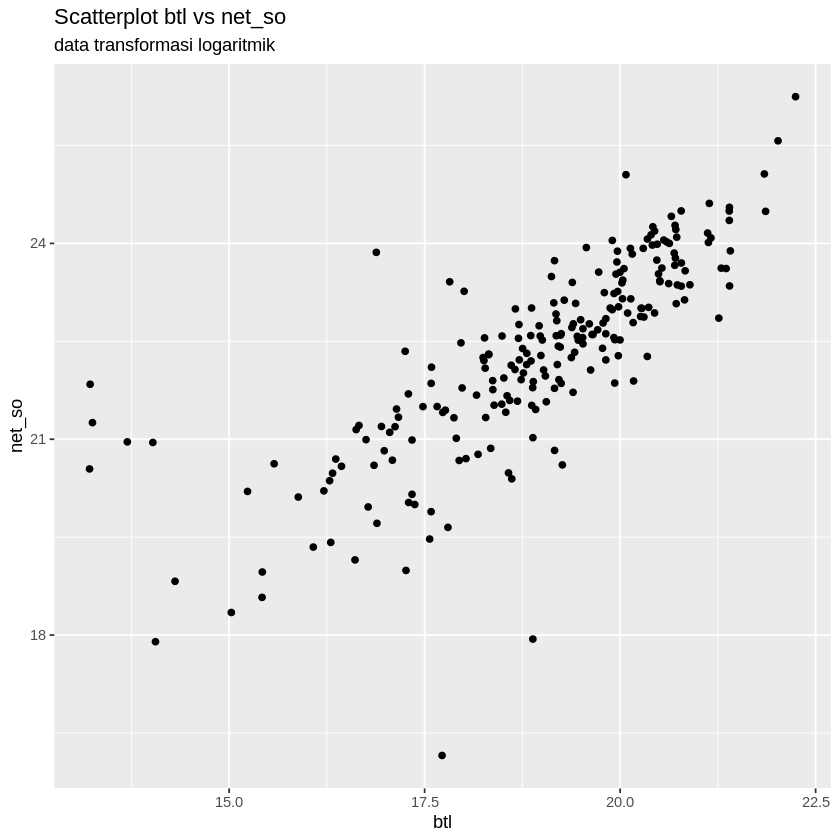

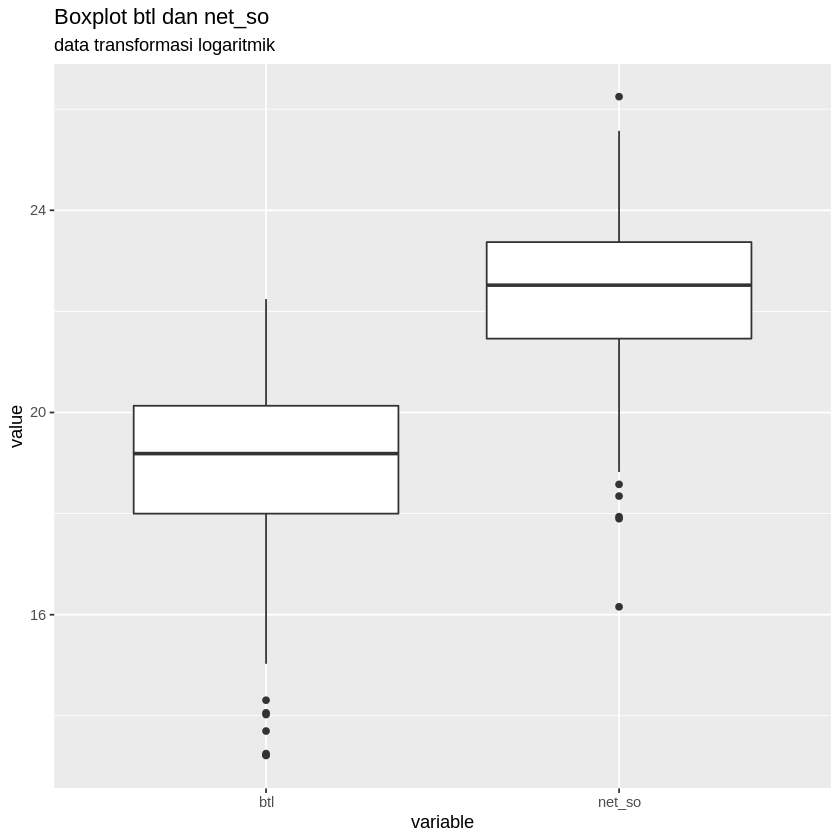

In [40]:
# transformasi
data_log = 
  data_1 %>%
  filter(btl > 0) %>%
  filter(net_so > 0) %>%
  mutate(btl = log(btl),
         net_so = log(net_so))

# scatterplot
data_log %>%
  ggplot(aes(x = btl,
             y = net_so)) +
  geom_point() +
  labs(title = "Scatterplot btl vs net_so",
       subtitle = "data transformasi logaritmik")

# boxplot
data_log %>%
  select(row_labels,btl,net_so) %>%
  melt(id.vars = "row_labels") %>%
  ggplot(aes(x = variable,
             y = value)) +
  geom_boxplot() +
  labs(title = "Boxplot btl dan net_so",
       subtitle = "data transformasi logaritmik")
  

Terlihat bahwa bentuk grafiknya sudah sangat baik dan kita __tidak perlu lagi melakukan penilaian secara visual yang subjektif__.

Mari kita lihat kembali nilai korelasinya sebagai berikut:

In [41]:
# perhitungan korelasi pearson
cor.test(data_log$btl,
         data_log$net_so,
         method = "pearson")

# perhitungan korelasi spearman
cor.test(data_log$btl,
         data_log$net_so,
         method = "spearman",
         exact=FALSE)


	Pearson's product-moment correlation

data:  data_log$btl and data_log$net_so
t = 19.148, df = 230, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7286793 0.8290036
sample estimates:
      cor 
0.7839061 



	Spearman's rank correlation rho

data:  data_log$btl and data_log$net_so
S = 295834, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8578511 


## Kesimpulan Tujuan II

1. Kedua analisa korelasi di atas menghasilkan $p-value$ yang kecil (mendekati nol) sehingga kita bisa simpulkan bahwa korelasi antara `btl` dan `net_so` __signifikan__ (tidak bisa diabaikan).
1. Nilai korelasi untuk:
    - $r_{pearson} \sim 0.7839$.
    - $r_{spearman} \sim 0.8578$.
1. Menggunakan metode ini, kita hanya perlu memfilter sekali saja (tidak boleh ada nilai nol) dan cukup melakukan transformasi data langsung.
